## knn
### 0. 简介
#### knn算法即k-近邻算法
> k-近邻算法 (k-nearest neighbor) 是一种基本分类与回归方法。  ----李航《统计学方法》

#### 思想
在给定的训练数据集中寻找与新输入的实例最近邻的 k 个实例，统计这 k 个实例所属的分类，则拥有实例个数最多的分类就看做是该新输入实例的分类。k-nn算法没有显示的学习过程，即不需要先训练算法。
#### 三要素
##### k值的选择
##### 距离度量
有$x_i, x_j$为 n 维向量，即$x_i, x_j \in R^n$， 则 $x_i, x_j$ 之间的距离 $L_p$ 定义为：
$$L_p(x_i, x_j)  = (\sum^{n}_{l=1} | x_i^{(l)} - x_j^{(l)}|)^{1/p} $$ 
- 当 p = 1 时，该距离成为[曼哈顿距离](https://zh.wikipedia.org/wiki/%E6%9B%BC%E5%93%88%E9%A0%93%E8%B7%9D%E9%9B%A2)。
- 当 p = 2 时，该距离称为[欧氏距离](https://zh.wikipedia.org/wiki/%E6%AC%A7%E5%87%A0%E9%87%8C%E5%BE%97%E8%B7%9D%E7%A6%BB)。
- 当 p = 无穷大 时， 该距离就是各个坐标距离的最大值。
##### 分类决策条件

### 1. 算法
#### 输入：
① 训练数据集 $ T = \{x_i, y_i\} $ ,i=1,2,...,N，$x_i$ 为实例的特征向量，$y_i$ 为实例的类别。

② 实例特征向量 x
#### 输出：实例 x 的类别

① 根据距离计算方法，如欧氏距离，计算出里 x 距离最近的 k 个点。

② 根据分类决策方法，如多数表决法，最总决定 x 的分类 y 。
                                  



In [1]:
# 准备数据
from numpy import *
import operator

def createDatSet():
    group = array([
        [1.0, 1.1],
        [1.0, 1.0],
        [0.0, 0.0],
        [0.0, 0.1]
    ])
    labels = ['A', 'A', 'B','B']
    return group, labels

In [27]:
# 我的实现方法
def classify00(inX, dataSet, labels, K):
    distance = []  # 存放距离和标签
    for i in range(len(dataSet)):
        sum = 0
        for j in range(len(inX)):
            sum += (inX[j] - dataSet[i][j])**2
        distance.append([sum, labels[i]])
    sortedDistance = sorted(distance, key=operator.itemgetter(0))
    classCount = {}
    for k in range(K):
        label = sortedDistance[k][1]
        classCount[label] = classCount.get(label, 0) + 1
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)[0][0]

# 书上的实现方法，使用了numpy中的一些函数
def classify01(inX, dataSet, labels, K):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet  #这里用到了numpy中的tile函数
    sqDiffMat = diffMat ** 2                         #将矩阵中的每一个元素平方
    sqDistances = sqDiffMat.sum(axis=1)              #将每一行求和
    distances = sqDistances ** 0.5                   #开方

    sortedDistanceIndicies = distances.argsort()     #排序，返回原数组按值从小到大排列的索引值
    classCount = {}                                  #标签统计
    for i in range(K):
        label = labels[sortedDistanceIndicies[i]]
        classCount[label] = classCount.get(label, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
     

In [22]:
dataSet, labels = createDatSet()
dataSet

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [16]:
dataSetSize = dataSet.shape[0]
diffMat = tile([1,1], (dataSetSize, 1)) - dataSet  #这里用到了numpy中的tile函数
sqDiffMat = diffMat ** 2                         #将矩阵中的每一个元素平方
sqDistances = sqDiffMat.sum(axis=1)              #将每一行求和
distances = sqDistances ** 0.5                   #开方
sortedDistanceIndicies = distances.argsort()
sortedDistanceIndicies, distances, diffMat

(array([1, 0, 3, 2], dtype=int64),
 array([0.1       , 0.        , 1.41421356, 1.3453624 ]),
 array([[ 0. , -0.1],
        [ 0. ,  0. ],
        [ 1. ,  1. ],
        [ 1. ,  0.9]]))

In [15]:
for i in range(3):
    print(sortedDistanceIndicies[i])

1
0
3


In [19]:
labels

['A', 'A', 'B', 'B']

In [29]:
cla= classify00([0, 0], dataSet, labels, 3)
cla

'B'

In [30]:
cla= classify01([0, 0], dataSet, labels, 3)
cla

'B'

### 2.示例：使用K-近邻算法改进网站的配对效果
#### 2.1 准备数据
dataSet中的每个样本有三个特征值，对应的分别是：玩视频游戏所耗时间百分比、每年获飞行常客里程数和每周消费的冰激凌公升数。
PS：这个数据时在线约会网站根据特征值给你推荐相应约会对象
共有三种标签：数据中用1、2、3代替

In [88]:
# 准备数据
# 将文本转换为numpy的解析程序
def file2matrix(filename):
    fr = open(filename)
    arrayLines = fr.readlines()
    numberOfLines = len(arrayLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    
    for line in arrayLines:
        line = line.strip()
        listFormLine = line.split('\t')
        returnMat[index,:] = listFormLine[0:3]
        classLabelVector.append(int(listFormLine[-1]))
        index += 1
    return returnMat, classLabelVector
        
        

In [94]:
dataSet, labels = file2matrix('datingTestSet2.txt')
dataSet

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

#### 2.2 分析数据：先把数据画出来

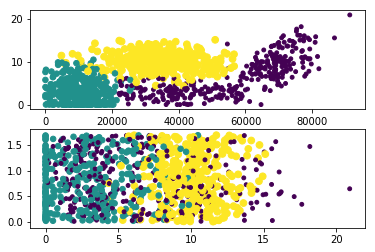

In [90]:
import matplotlib
import matplotlib.pyplot as plt 
fig = plt.figure()
a1 = fig.add_subplot(211)
a1.scatter(dataSet[:,0], dataSet[:,1], 15.0*array(labels), 15.0*array(labels))
a2 = fig.add_subplot(212)
a2.scatter(dataSet[:,1], dataSet[:,2], 15.0*array(labels), 15.0*array(labels))
plt.show()

数据中一共三列数据，可以看出第一列和第二列数据的区分度很好，第二列和第三列就很模糊

#### 2.3 归一化数据
因为有些特征数据之间的差值比较大，有些特征数据之间的差值较小，在计算距离时差值较大的特征就会在距离中起到主导地位。我们应该消除这种影响，于是采用归一化，使用 $newVals = (oldVals - minVals) / (maxVals - minVals)$ 将所有的特征值都变换到0-1之间，这样对于每个特征来说都平等的对距离计算起作用。

In [91]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(dataSet.shape)
    m = dataSet.shape[0]
    normDataSet = (dataSet - tile(minVals, (m, 1))) / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [92]:
n, r, mv = autoNorm(dataSet)

In [93]:
n

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

#### 2.4 测试算法

In [99]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")
    normData, ranges, minVals = autoNorm(datingDataMat)
    m = normData.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0
    for i in range(numTestVecs):
        classifyResult = classify00(normData[i, :], normData[numTestVecs:m, :], datingLabels[numTestVecs:m], 5)
        if classifyResult != datingLabels[i]:
            errorCount += 1
        print("the classifier came back with: {cr}, the real answer is: {ra}. ".format(cr=classifyResult, ra=datingLabels[i]))
    print("the total error rate is: {er}".format(er=(errorCount / float(numTestVecs))))

In [100]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3. 
the classifier came back with: 2, the real answer is: 2. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 3, the real answer is: 3. 
the classifier came back with: 3, the real answer is: 3. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 3, the real answer is: 3. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 2, the real answer is: 2. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier came back with: 1, the real answer is: 1. 
the classifier

#### 2.5 使用算法
约会网站预测函数


In [101]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([percentTats, ffMiles, iceCream])
    classifierResult = classify01((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print("you will probably like this person: {cr}".format(cr=resultList[classifierResult-1]))

In [102]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
you will probably like this person: not at all


### 3 将KNN应用于手写数字识别
#### 3.1 准备数据
将图像转换为测试向量